In [52]:
import helpers
import numpy as np
from collections import defaultdict

data = """7,1
11,1
11,7
9,7
9,5
2,5
2,3
7,3"""

with open("input_9.txt", 'r') as f:
    data = f.read().rstrip()
    
data = [tuple((map(int, x.split(",")))) for x in data.split("\n")]
outer = Polygon(data)

In [55]:
from shapely.geometry import Polygon, LineString
from tqdm import tqdm

def get_rectangle(coord1,coord2):
    bounds = abs(np.array(coord1, dtype=np.int64) - np.array(coord2, dtype=np.int64)) + [1,1]
    return bounds[0] * bounds[1]

def make_polygon(coord1, coord2):
    if coord1[0] == coord2[0] or coord1[1] == coord2[1]:
        polygon = LineString([coord1, coord2])
    else:
        polygon = Polygon([coord1, (coord2[0], coord1[1]), coord2, (coord1[0], coord2[1])])
    return polygon


ans = 0
for coord1 in tqdm(data):
    for coord2 in data:
        inner = make_polygon(coord1, coord2)
        if outer.covers(inner):
            area = get_rectangle(coord1,coord2)
            if area > ans:
                best_inner = inner
                ans = area
ans

100%|██████████| 496/496 [01:44<00:00,  4.75it/s]


1470616992

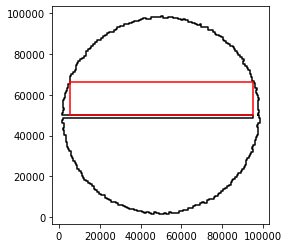

In [57]:
x1, y1 = outer.exterior.xy
x2, y2 = best_inner.exterior.xy

plt.plot(x1, y1, color='black')
plt.plot(x2, y2, color='red')

plt.gca().set_aspect('equal')
plt.show()